----------
## Chapter 10: Data Cleaning Level II – Unpacking, Restructuring, and Reformulating the Table
----------

In level I data cleaning, we were only concerned about the neat and codable organization
of our dataset. As we mentioned previously, level I data cleaning can be done in isolation,
without having to keep an eye on what data will be needed next. However, level II data
cleaning is deeper. It is more about preparing the dataset for analysis and the tools for
this process. In other words, in level II data cleaning, we have a dataset that is reasonably
clean and is in a standard data structure, but the analysis we have in mind cannot be done
because the data needs to be in a specific structure due to the analysis itself, or the tool we
plan to use for the analysis.

In this chapter, we will look at three examples of level II data cleaning that tend to happen
frequently. Pay attention to the fact that, unlike level I data cleaning, where the examples
were merely a source of data, the examples for level II date cleaning must be coupled with
an analytical task.

In this chapter, we're going to cover the following main topics:

1. **Case Study 1:** unpacking columns and reformulating the table
2. **Case Study 2:** restructuring the table
3. **Case Study 3:** level I and II data cleaning

#### **CASE STUDY 1:** unpacking columns and reformulating the table

------

In this example, we will use the level I cleaned `speech_df` dataset to create the following  bar chart. We cleaned this Data Frame in Chapter 9, Data Cleaning Level I – Cleaning Up the Table. The level I cleaned `speech_df`
database only has two columns: `file-name` and `content`. To be able to create the
following visual, we need columns such as the month of the speech and the number of
times the four words (vote, tax, campaign, and economy) have been repeated in each
speech. 

The following is a list of the information we need and the column of `speech_df` that this
information is stored in:

- The month of the speech: This information is in the file_name column.
- The number of times the words vote, tax, campaign, and economy have been repeated in each speech: This information is in the `content` column:



In [1]:
from os import listdir

speech_files = listdir('Speeches/')

print(speech_files)

['FayettevilleSep9_2019.txt', 'TupeloNov1_2019.txt', 'NewHampshireAug15_2019.txt', 'HendersonSep13_2020.txt', 'OhioSep21_2020.txt', 'PhoenixFeb19_2020.txt', 'BattleCreekDec19_2019.txt', 'PittsburghSep22_2020.txt', 'TexasSep23_2019.txt', 'ColoradorSpringsFeb20_2020.txt', 'LatrobeSep3_2020.txt', 'DallasOct17_2019.txt', 'DesMoinesJan30_2020.txt', 'MinneapolisOct10_2019.txt', 'YumaAug18_2020.txt', 'ToledoJan9_2020.txt', 'CharlotteMar2_2020.txt', 'Winston-SalemSep8_2020.txt', 'TulsaJun20_2020.txt', 'NewMexicoSep16_2019.txt', 'HersheyDec10_2019.txt', 'NewHampshireFeb10_2020.txt', 'LasVegasFeb21_2020.txt', 'NewHampshireAug28_2020.txt', 'MindenSep12_2020.txt', 'FreelandSep10_2020.txt', 'CharlestonFeb28_2020.txt', 'MosineeSep17_2020.txt', 'MilwaukeeJan14_2020.txt', 'LexingtonNov4_2019.txt', 'BemidjiSep18_2020.txt', 'CincinnatiAug1_2019.txt', 'FayettevilleSep19_2020.txt', 'WildwoodJan28_2020.txt', 'GreenvilleJul17_2019.txt']


In [2]:
import pandas as pd

speech_df = pd.DataFrame(index = range(len(speech_files)), columns = ['file_name', 'content'])

for idx, file_name in enumerate(speech_files):
    
    file = open(f'Speeches/{file_name}', 'r', encoding='utf-8')
    
    content = file.read()
    
    file.close
    
    speech_df.loc[idx, 'file_name'] = file_name
    speech_df.loc[idx, 'content'] = content

In [3]:
speech_df.head()

,file_name,content
0,FayettevilleSep9_2019.txt,Thank you everybody. Thank you and Vice Presi...
1,TupeloNov1_2019.txt,"ell, thank you very much. And hello, Tupelo. T..."
2,NewHampshireAug15_2019.txt,Thank you very much everybody. Thank you. Wow...
3,HendersonSep13_2020.txt,"Thank you, thank you. Wow. Wow, and I'm thrill..."
4,OhioSep21_2020.txt,"Wow, that's a big crowd. This is a big crowd. ..."


We can "unpack" the `file_name` column for each entry to obtain the information about the city, month, year, day of the month! We can first use the month abbreviation in each file name to separate city from the rest. 

In [4]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for idx in range(len(speech_df)):
    
    for mon in months:
        
        if mon in speech_df.loc[idx,'file_name']:
            
            month = mon
            
            city, day_year_w_ext = speech_df.loc[idx,'file_name'].split(f'{mon}')
            
            day, year_w_ext = day_year_w_ext.split('_')
            
            year, _ = year_w_ext.split('.')
            
            date = year + "-" + month + '-' + day
            
            speech_df.loc[idx, 'City'] = city
            
            speech_df.loc[idx, 'Date'] = pd.to_datetime(date, errors='coerce')
            
speech_df['Month'] = speech_df.Date.dt.month 
speech_df['Day'] = speech_df.Date.dt.day 
speech_df['Year'] = speech_df.Date.dt.year  

speech_df.drop(columns=['file_name'], inplace = True)

speech_df.head()

,content,City,Date,Month,Day,Year
0,Thank you everybody. Thank you and Vice Presi...,Fayetteville,2019-09-09,9,9,2019
1,"ell, thank you very much. And hello, Tupelo. T...",Tupelo,2019-11-01,11,1,2019
2,Thank you very much everybody. Thank you. Wow...,NewHampshire,2019-08-15,8,15,2019
3,"Thank you, thank you. Wow. Wow, and I'm thrill...",Henderson,2020-09-13,9,13,2020
4,"Wow, that's a big crowd. This is a big crowd. ...",Ohio,2020-09-21,9,21,2020


Unpacking the column `content` differs somewhat from unpacking `file-name`. As
the column `file_name` only had a limited amount of information, we were able to
unpack everything this column had to offer. However, the column `content` has a lot of
information and it could be unpacked in many different ways. However, we only need to
unpack a small portion of what is under the column Content; we need to know about
the ratio of the usage of four words: `vote`, `tax`, `campaign`, and `economy`.

In [5]:
def find_word_ratio(row, words = ['vote', 'tax', 'campaign', 'economy']):
    
    num_of_tot_words = len(row.content.split(' '))
    
    for word in words:
        
        row[f'{word}_r'] = row.content.count(word) / num_of_tot_words
        
    return row     

speech_df = speech_df.apply(find_word_ratio, axis = 1)

In [6]:
speech_df

,content,City,Date,Month,Day,Year,vote_r,tax_r,campaign_r,economy_r
0,Thank you everybody. Thank you and Vice Presi...,Fayetteville,2019-09-09,9,9,2019,0.002174,0.000652,0.000326,0.000652
1,"ell, thank you very much. And hello, Tupelo. T...",Tupelo,2019-11-01,11,1,2019,0.001079,0.000324,0.000431,0.000108
2,Thank you very much everybody. Thank you. Wow...,NewHampshire,2019-08-15,8,15,2019,0.001479,0.000887,0.001775,0.000296
3,"Thank you, thank you. Wow. Wow, and I'm thrill...",Henderson,2020-09-13,9,13,2020,0.001568,0.000560,0.000224,0.000448
4,"Wow, that's a big crowd. This is a big crowd. ...",Ohio,2020-09-21,9,21,2020,0.000926,0.000463,0.000370,0.000278
5,"Thank you very much, Phoenix. We love to be b...",Phoenix,2020-02-19,2,19,2020,0.001681,0.001471,0.000525,0.000420
6,Thank you. Thank you. Thank you to Vice Presid...,BattleCreek,2019-12-19,12,19,2019,0.000561,0.000505,0.000224,0.000617
7,Doesn't have the power. Doesn't have the stayi...,Pittsburgh,2020-09-22,9,22,2020,0.000830,0.000166,0.000581,0.000415
8,"Hello, Houston. I am so thrilled to be here in...",Texas,2019-09-23,9,23,2019,0.000804,0.002413,0.000402,0.000804
9,"Hello Colorado. We love Colorado, most beautif...",ColoradorSprings,2020-02-20,2,20,2020,0.000772,0.000601,0.000172,0.000172


We found the ratio of the words of interest with respect to total words within a Trump speech between July 2019 and Sep 2020. However, we are interested in these ratios for speeches given within a month! 

In its current form each row in `speech_df` contains information about one of Donald Trump's speeches. Therefore, we need to reformulate a new table so that the definition of our data object is "Donald Trump's speeches in a month" instead of "one Donald Trump speech".  

In [7]:
speech_df['Y_M'] = speech_df.apply(lambda row: f'{row.Year}_{months[row.Month - 1]}', axis = 1)

In [8]:
import numpy as np

words = ['vote', 'tax', 'campaign', 'economy']
monthly_word_ratios_df = speech_df.pivot_table(index = ['Y_M'], values = [f'{word}_r' for word in words], aggfunc= np.mean)

monthly_word_ratios_df

,campaign_r,economy_r,tax_r,vote_r
Y_M,,,,
2019_Aug,0.001499,0.000270,0.000872,0.001596
2019_Dec,0.000316,0.000665,0.000558,0.000739
2019_Jul,0.000283,0.000660,0.000660,0.001603
2019_Nov,0.000551,0.000333,0.000385,0.002048
2019_Oct,0.000843,0.000448,0.000419,0.000409
2019_Sep,0.000533,0.000572,0.001340,0.001398
2020_Aug,0.000428,0.000222,0.001189,0.001577
2020_Feb,0.000353,0.000224,0.000625,0.001206
2020_Jan,0.000299,0.000240,0.001331,0.001215


In [9]:
row_order = speech_df.sort_values('Date').Y_M.unique()
col_order = monthly_word_ratios_df.sum().sort_values(ascending = False).index

In [10]:
monthly_word_ratios_df.loc[row_order,col_order]

,vote_r,tax_r,campaign_r,economy_r
Y_M,,,,
2019_Jul,0.001603,0.000660,0.000283,0.000660
2019_Aug,0.001596,0.000872,0.001499,0.000270
2019_Sep,0.001398,0.001340,0.000533,0.000572
2019_Oct,0.000409,0.000419,0.000843,0.000448
2019_Nov,0.002048,0.000385,0.000551,0.000333
2019_Dec,0.000739,0.000558,0.000316,0.000665
2020_Jan,0.001215,0.001331,0.000299,0.000240
2020_Feb,0.001206,0.000625,0.000353,0.000224
2020_Mar,0.000750,0.001500,0.000150,0.000450


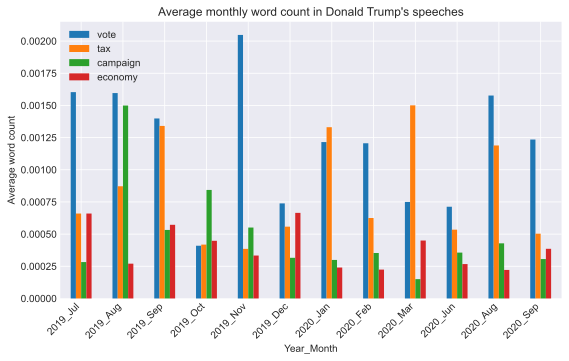

In [11]:
from matplotlib import pyplot as plt
#For inline plotting 
%matplotlib inline                 
%config InlineBackend.figure_format = 'svg'

plt.style.use("seaborn-v0_8-dark") 


fig, axes = plt.subplots(figsize = (9,5))

monthly_word_ratios_df.loc[row_order,col_order].plot.bar(ax = axes)

axes.set_xticklabels(row_order, rotation=45, ha='right')
axes.set_xlabel('Year_Month')
axes.set_ylabel('Average word count')
axes.legend(words, loc = 2)

axes.set_title("Average monthly word count in Donald Trump's speeches")

axes.grid()


#### **CASE STUDY 2:** Restructuring the table
------

In this example, we will use the `Customer Churn.csv` dataset which contains
the records of 3,150 customers of a telecommunication company. The rows are described
by demographic columns such as gender and age, and activity columns such as the
distinct number of calls in 9 months. The dataset also specifies whether each customer
was churned or not 3 months after the 9 months of collecting the activity data of the
customers. Customer churning, from a telecommunication company's point of view,
means the customer stops using the company's services and receives the services from the
company's competitor.

We would like to use box plots to compare the two populations of churning customers
and non-churning customers for the following activity columns: `Call Failure`,
`Subscription Length`, `Seconds of Use`, `Frequency of use`, `Frequency of SMS`, and
`Distinct Called Numbers`.

In [12]:
customer_df = pd.read_csv('Customer Churn.csv')

customer_df.head(5)

,Call Failure,Complains,Subscription Length,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Status,Churn
0,8,0,38,4370,71,5,17,1,0
1,0,0,39,318,5,7,4,0,0
2,10,0,37,2453,60,359,24,1,0
3,10,0,38,4198,66,1,35,1,0
4,3,0,38,2393,58,2,33,1,0


At first glance, we can see that this dataset needs some level I data cleaning. While the
column titles are intuitive, they can become more codable. 

In [13]:
customer_df.columns = ['num_call_failure', 'complaints', 'subscription_length', 'usage_sec', 'freq_of_use', 'freq_of_sms', 'distinct_called_numbers',
                       'status', 'churn']

In [29]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   num_call_failure         3150 non-null   int64
 1   complaints               3150 non-null   int64
 2   subscription_length      3150 non-null   int64
 3   usage_sec                3150 non-null   int64
 4   freq_of_use              3150 non-null   int64
 5   freq_of_sms              3150 non-null   int64
 6   distinct_called_numbers  3150 non-null   int64
 7   status                   3150 non-null   int64
 8   churn                    3150 non-null   int64
dtypes: int64(9)
memory usage: 221.6 KB


Now that the dataset has been level I cleaned, we can pay attention to level II data cleaning.

This example needs us to draw six box plots. Let's focus on the first box plot; the rest will
follow the same data cleaning process. Let's focus on creating multiple box plots that compare the `num_call_failure` attribute of
churning customers with that of non-churning customers. A box plot is an analytic tool
that needs a simpler data structure than a dataset. A box plot only needs a dictionary.

For the box plot we want to draw, the dictionary we need has two keys – churn and
non-churn – one for each population that will be presented. The value for each key is the
collection of `num_call_failure` records for each population. Pay attention to the fact that,
unlike a table data structure that has two dimensions (rows and columns), a dictionary
only has one dimension.

The following code shows the usage of a pandas Series as a dictionary to prepare the data
for the box plot. 

In [51]:
churn_vals = customer_df.churn.unique() # 0 or 1
call_fail_sr = pd.Series('', index = churn_vals) # index is either churn or non-churn

# collect all num_call_failure values for churn and non-churn customers
call_fail_sr.loc[0] = customer_df['num_call_failure'][customer_df.churn == 0].values
call_fail_sr.loc[1] = customer_df['num_call_failure'][customer_df.churn == 1].values        


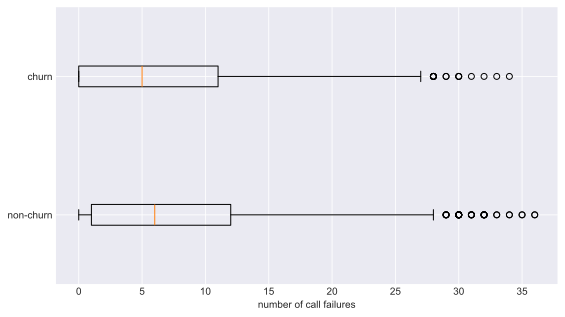

In [70]:
fig, axes = plt.subplots(figsize = (9,5))


axes.boxplot(call_fail_sr, vert = False)

axes.set_yticks([1,2],['non-churn', 'churn'])
axes.set_xlabel('number of call failures')
axes.grid()


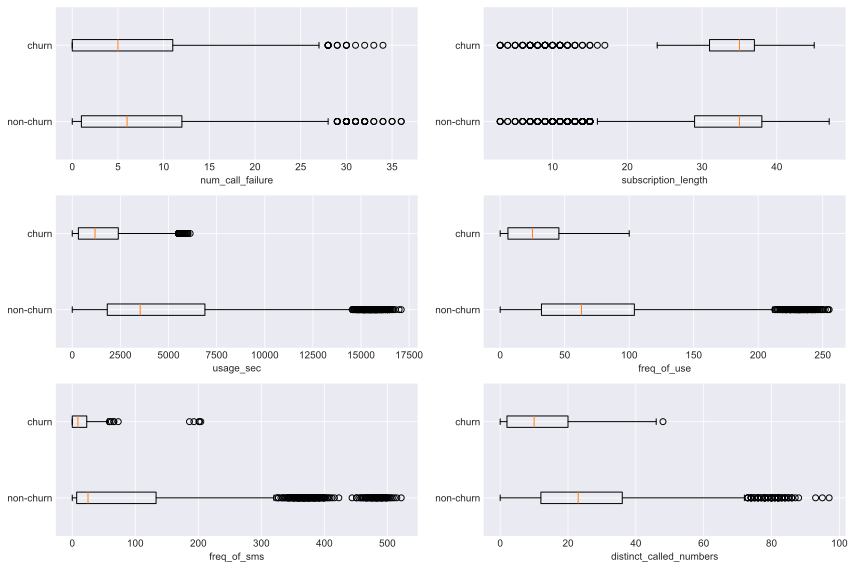

In [72]:
# for all attributes we are after 

plot_cols = ['num_call_failure', 'subscription_length', 'usage_sec', 'freq_of_use', 'freq_of_sms', 'distinct_called_numbers']

plt.figure(figsize = (12,8))

for idx, col in enumerate(plot_cols): 
    
    churn_vals = customer_df.churn.unique() # 0 or 1
    plot_sr = pd.Series('', index = churn_vals) # index is either churn or non-churn
    
    # collect all values of a given attribute within the loop for churn and non-churn customers
    plot_sr.loc[0] = customer_df[col][customer_df.churn == 0].values
    plot_sr.loc[1] = customer_df[col][customer_df.churn == 1].values
    
    plt.subplot(3,2,idx+1)
    
    plt.boxplot(plot_sr, vert = False)
    
    plt.yticks([1,2],['non-churn', 'churn'])
    plt.xlabel(f'{col}')
    plt.grid()

plt.tight_layout()
         

In this example, we looked at a situation where we needed to restructure the data so that
it was ready for the analytic tool of our choice, the box plot. In the next example, we
will look at a more complicated situation where we will need to perform both dataset
reformulation and restructuring to make predictions.

#### **Case Study 3:** Level I and II data cleaning
----- 

In this example, we want to use `Electric_Production.csv` to make predictions. We
are specifically interested in being able to predict what the monthly electricity demand
will be 1 month from now on. This 1-month gap is designed in the prediction model so that
the predictions that come from the model will have decision-making values; that is, the
decision-makers will have time to react to the predicted value.

We would like to use linear regression to perform this prediction. The independent variables/regressor for this task are 

1. **Average demand of the month over the years:** For instance, if the month we want
to predict demands for is March 2022, we want to use the average of the demands
for every March in the previous years. So, we will collate the historical demands
of March from the beginning of the data collection process (1985) to 2021 and
calculate its average. This is shown in the following diagram.

2. **Slope of change for the demand of the month over the years:** For instance, if the
month we want to predict demands for is March 2022, we want to use the slope of
change in the demand in March over the years. 

3. **Average demands of months t-2, t-3, and t-4:** Since we want to predict the demand for the month $t$ with a one-month gap for decision-making, we will use the average of the electricity demands of 2-months ago, 3 months ago and 4 months ago as a regressor.   

Now that we have a clear understanding of the data analytic goal, we will focus on
preprocessing the data. 

In [74]:
demand_df = pd.read_csv('Electric_Production.csv')

demand_df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [ ]:
# First level cleaning 

demand_df.columns = ['Date', 'Demand']

demand_df['Date'] = pd.to_datetime(demand_df['Date'])

demand_df.set_index('Date', inplace=True)

demand_df.head()


,Demand
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


Next, we can preprocess the data in a form suitable for the regression task we are after. For this purpose, we create a dictionary of the regressor and the target in an abbreviated form along with their more precise explanation as the values of that dictionary. 

In [ ]:
var_dict = {'X_1': 'All time average demand of the month', 'X_2': 'Slope of change for the demand over the years', 'X_3': 'Average demand of the month t-2, t-3, t-4',
            'y': 'Demand of the month t'}

# We skip the first 24 months due to second regressor: first 24 values would not have meaningful slope 
model_df = pd.DataFrame(index = demand_df.iloc[24:].index, columns=var_dict.keys())

In [80]:
model_df

,X_1,X_2,X_3,y
Date,,,,
1987-01-01,NaN,NaN,NaN,NaN
1987-02-01,NaN,NaN,NaN,NaN
1987-03-01,NaN,NaN,NaN,NaN
1987-04-01,NaN,NaN,NaN,NaN
1987-05-01,NaN,NaN,NaN,NaN
...,...,...,...,...
2017-09-01,NaN,NaN,NaN,NaN
2017-10-01,NaN,NaN,NaN,NaN
2017-11-01,NaN,NaN,NaN,NaN


In [84]:
# next we will fill the model_df starting with the dependent variable
model_df.y = demand_df['Demand'].iloc[24:].values

In [ ]:
# Get X_1: Average demand of the month over the years 

# first generate a Month column in the original df that stores the numeric month values

demand_df['Month'] = demand_df.index.month.to_list()

# we will use .apply to iterate over the rows of the model_df
def compute_X1(row):
    
    row_date = row.name # .name gives the index value of the row being processed
    
    # filter the demand_df using the row_date so that we do not use dates that are later than current row_date
    
    prev_df = demand_df.loc[:row_date].iloc[:-1]
    
    return prev_df[prev_df.Month == row_date.month].Demand.mean()
    
model_df.X_1 = model_df.apply(compute_X1, axis = 1)    


In [124]:
# Get X_2: Slope of change for the demand of the month over the years

from sklearn.linear_model import LinearRegression

def compute_X2(row):
    
    row_date = row.name # .name gives the index value of the row being processed
    
    prev_demands_df = demand_df.loc[:row_date].iloc[:-1]
    
    # filtered df with previous data points of the same month (e.g Jan, May .etc)
    prev_demands_df = prev_demands_df[prev_demands_df.Month == row_date.month]
    
    prev_demands_df.reset_index(drop = True, inplace = True)
    prev_demands_df.drop(columns = ['Month'], inplace = True)
    
    prev_demands_df['integer'] = range(len(prev_demands_df))
    prev_demands_df['ones'] = 1
    
    lr = LinearRegression()
    
    lr.fit(prev_demands_df.drop(columns = ['Demand']), prev_demands_df.Demand)
    
    return lr.coef_[0] # return the slope 
    
model_df.X_2 = model_df.apply(compute_X2, axis = 1)

In [126]:
# X_3: Average demands of t-2, t-3, t-4 

def compute_X3(row): 
    
    row_date = row.name
    
    prev_demands_df = demand_df.loc[:row_date].iloc[-5:-2]
    
    return prev_demands_df.Demand.mean()

model_df.X_3 = model_df.apply(compute_X3, axis =1)

In [129]:
# Predict using linear regression

X = model_df.drop(columns = ['y'])

y = model_df.y

lin_reg = LinearRegression()

lin_reg.fit(X,y)



LinearRegression()

In [131]:
print(f"Intercept: {lin_reg.intercept_:.3f}")

Intercept: -25.753


In [132]:
coef_names = ['b1', 'b2', 'b3']

prediction_df = pd.DataFrame({'regressor': X.columns, 'coef': coef_names, 'coef_val': lin_reg.coef_})

prediction_df

,regressor,coef,coef_val
0,X_1,b1,1.295225
1,X_2,b2,1.436991
2,X_3,b3,0.151708


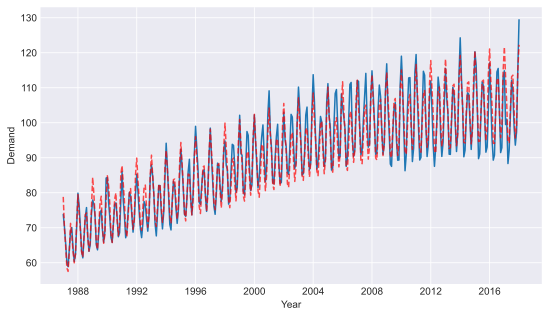

In [135]:
fig, axes = plt.subplots(figsize = (9,5))

axes.plot(X.index, y, label = 'True')

axes.plot(X.index, lin_reg.predict(X), c = 'red', alpha = 0.7 , ls = '--', label = 'Fitted')

axes.set_xlabel('Year')
axes.set_ylabel('Demand')

axes.grid()



### **Exercises**: 
-----

1. For this exercise, we will be using `LaqnData.csv`, which can be found on the
London Air [website](https://www.londonair.org.uk/LondonAir/). The dataset includes the hourly readings of five air particles (NO,
NO2, NOX, PM2.5, and PM10) from a specific site. Perform the following steps
for this dataset:

- a) Read the dataset into `air_df` using pandas.
- b) Use the `.unique()` function to identify the columns that only have one possible
value and then remove them from `air_df`.
- c) Unpack the `readingDateTime` column into two new columns called `Date`
and `time`. 
- d) Use what you learned in this chapter to create plots of day readings of each air particle. 


a) 

In [14]:
air_df = pd.read_csv('LaqnData.csv')

air_df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


In [15]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     43800 non-null  object 
 1   Species                  43800 non-null  object 
 2   ReadingDateTime          43800 non-null  object 
 3   Value                    40570 non-null  float64
 4   Units                    43800 non-null  object 
 5   Provisional or Ratified  43800 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.0+ MB


b) 

In [16]:
trivial_cols = []
for col in air_df.columns: 
    
    if len(air_df[col].unique()) == 1:
        
        trivial_cols.append(col)

print(f"Columns with only one possible entry: {trivial_cols}")        

Columns with only one possible entry: ['Site', 'Provisional or Ratified']


In [17]:
air_df.drop(columns=trivial_cols, inplace = True)

air_df.head()

,Species,ReadingDateTime,Value,Units
0,NO,01/01/2017 00:00,3.5,ug m-3
1,NO,01/01/2017 01:00,3.6,ug m-3
2,NO,01/01/2017 02:00,2.2,ug m-3
3,NO,01/01/2017 03:00,2.1,ug m-3
4,NO,01/01/2017 04:00,3.3,ug m-3


c)

In [18]:
def split(row, flag = True):
    
    date, time = row['ReadingDateTime'].split(' ')
    
    date = pd.to_datetime(date, errors='coerce', dayfirst=True)
    
    if flag: 
        
        return date 
    
    else: 
        
        #time = pd.to_datetime(time)
        return time
    
    

In [19]:
air_df['Date'] = air_df.apply(lambda x: split(x, flag = True), axis = 1)

In [20]:
air_df['Time'] = air_df.apply(lambda x: split(x, flag = False), axis = 1)

In [21]:
air_df

,Species,ReadingDateTime,Value,Units,Date,Time
0,NO,01/01/2017 00:00,3.5,ug m-3,2017-01-01,00:00
1,NO,01/01/2017 01:00,3.6,ug m-3,2017-01-01,01:00
2,NO,01/01/2017 02:00,2.2,ug m-3,2017-01-01,02:00
3,NO,01/01/2017 03:00,2.1,ug m-3,2017-01-01,03:00
4,NO,01/01/2017 04:00,3.3,ug m-3,2017-01-01,04:00
...,...,...,...,...,...,...
43795,PM2.5,31/12/2017 19:00,-2.0,ug m-3,2017-12-31,19:00
43796,PM2.5,31/12/2017 20:00,6.0,ug m-3,2017-12-31,20:00
43797,PM2.5,31/12/2017 21:00,5.0,ug m-3,2017-12-31,21:00
43798,PM2.5,31/12/2017 22:00,5.0,ug m-3,2017-12-31,22:00


d)

In [53]:
species = list(air_df['Species'].unique())

plot_df = air_df.set_index(['Species', 'Date', 'Time'])[['Value']]

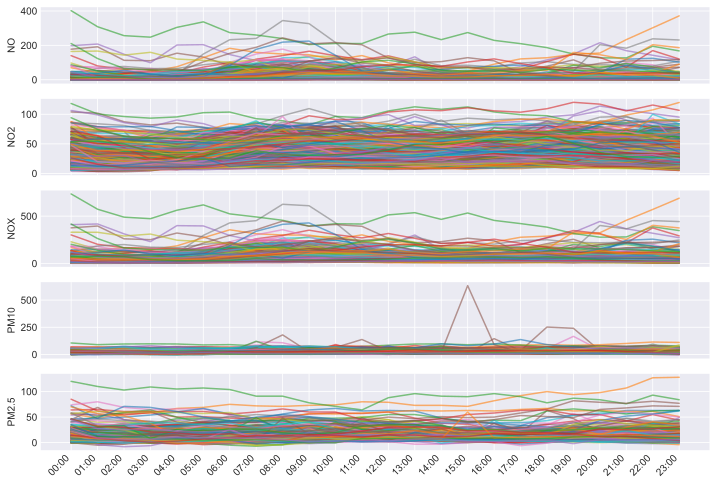

In [60]:
fig, axes = plt.subplots(5,1,figsize = (12,8), sharex=True)

xtick_labels = list(plot_df.loc['NO', '2017-01-01'].index)

for idx, s in enumerate(species):
    
    for date in air_df['Date'].unique():
        
        axes[idx].plot(plot_df.loc[s, date], alpha = 0.6)
        
    axes[idx].set_xticks(range(24))    
    axes[idx].set_xticklabels(xtick_labels, rotation=45, ha='right')
    axes[idx].set_ylabel(s)
    axes[idx].grid()    
